# MLB Baseball Analytics

In this project, we are going to use machine learning models to predict the number of games that a Major-League Baseball team won that season based on the team's stats and other variables for the season.

### Importing Data

The data for the 2016 MLB season is already compiled by Sean Lahman on his [website.](http://www.seanlahman.com/baseball-archive/statistics/)

Then the data was transformed into an SQLite database [here.](https://github.com/jknecht/baseball-archive-sqlite)

In [1]:
import pandas as pd
import sqlite3

In [2]:
# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

Now that we are connected to the SQLite database, we are now going to query for all season where a team played 150 or more games and is still active today

In [5]:
query = '''
    SELECT * 
    FROM Teams 
    INNER JOIN TeamsFranchises ON Teams.franchID == TeamsFranchises.franchID
    WHERE Teams.G >= 150 AND TeamsFranchises.active == 'Y';
'''

Teams = conn.execute(query).fetchall()

# Convert results to DataFrame
teams_df = pd.DataFrame(Teams)

In [6]:
teams_df.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


### Data Cleaning and Processing

As you can see from the table above, the column names are not included. And so we need to add the column names. Some of the more important variables are noted below. But a full list of all variable descriptions can be found on [Sean Lahman's website's readme.](http://seanlahman.com/files/database/readme2016.txt)

    yearID - Year
    teamID - Team
    franchID - Franchise (links to TeamsFranchise table)
    G - Games played
    W - Wins
    LgWin - League Champion(Y or N)
    WSWin - World Series Winner (Y or N)
    R - Runs scored
    AB - At bats
    H - Hits by batters
    HR - Homeruns by batters
    BB - Walks by batters
    SO - Strikeouts by batters
    SB - Stolen bases
    CS - Caught stealing
    HBP - Batters hit by pitch
    SF - Sacrifice flies
    RA - Opponents runs scored
    ER - Earned runs allowed
    ERA - Earned run average
    CG - Complete games
    SHO - Shutouts
    SV - Saves
    IPOuts - Outs Pitched (innings pitched x 3)
    HA - Hits allowed
    HRA - Homeruns allowed
    BBA - Walks allowed
    SOA - Strikeouts by pitchers
    E - Errors
    DP - Double Plays
    FP - Fielding percentage
    name - Team’s full name

Now we are going to add column headers based on the variable names we find in the readme.

In [7]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [8]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,603510,111,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,1144063,97,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,821015,94,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,760439,90,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,566727,97,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None


Taking a look at info below, it looks like there is a total of 2,287 rows and there are some null values that we need to deal with.

In [11]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 52 columns):
yearID            2287 non-null int64
lgID              2287 non-null object
teamID            2287 non-null object
franchID          2287 non-null object
divID             1236 non-null object
Rank              2287 non-null int64
G                 2287 non-null int64
Ghome             2265 non-null float64
W                 2287 non-null int64
L                 2287 non-null int64
DivWin            1236 non-null object
WCWin             626 non-null object
LgWin             2287 non-null object
WSWin             2249 non-null object
R                 2287 non-null int64
AB                2287 non-null int64
H                 2287 non-null int64
2B                2287 non-null int64
3B                2287 non-null int64
HR                2287 non-null int64
BB                2287 non-null int64
SO                2177 non-null float64
SB                2287 non-null int64
CS      

##### Dropping Columns

There are some variables that we could eliminate as they aren't related at all to the target column (Wins).

In [12]:
# Dropping your unnecesary column variables.
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis=1)

In [13]:
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,...,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP
0,1961,LAA,162,70,744,5424,1331,218,22,189,...,5,34,4314,1391,180,713,973,192,154.0,0.969
1,1962,LAA,162,86,718,5499,1377,232,35,137,...,15,47,4398,1412,118,616,858,175,153.0,0.972
2,1963,LAA,161,70,597,5506,1378,208,38,95,...,13,31,4365,1317,120,578,889,163,155.0,0.974
3,1964,LAA,162,82,544,5362,1297,186,27,102,...,28,41,4350,1273,100,530,965,138,168.0,0.978
4,1965,CAL,162,75,527,5354,1279,200,36,92,...,14,33,4323,1259,91,563,847,123,149.0,0.981


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 29 columns):
yearID    2287 non-null int64
teamID    2287 non-null object
G         2287 non-null int64
W         2287 non-null int64
R         2287 non-null int64
AB        2287 non-null int64
H         2287 non-null int64
2B        2287 non-null int64
3B        2287 non-null int64
HR        2287 non-null int64
BB        2287 non-null int64
SO        2177 non-null float64
SB        2287 non-null int64
CS        1868 non-null float64
HBP       510 non-null float64
RA        2287 non-null int64
ER        2287 non-null int64
ERA       2287 non-null float64
CG        2287 non-null int64
SHO       2287 non-null int64
SV        2287 non-null int64
IPouts    2287 non-null int64
HA        2287 non-null int64
HRA       2287 non-null int64
BBA       2287 non-null int64
SOA       2287 non-null int64
E         2287 non-null int64
DP        2265 non-null float64
FP        2287 non-null float64
dtypes: flo

##### Null values

Now let's deal with the null values. There is a tradeoff when we are dealing with null values - we need clean data but we don't have a large amount of data to spare. Two of the columns have a relatively small amount of null values. There are 110 null values in the SO (Strike Outs) column and 22 in the DP (Double Play) column. Two of the columns have a relatively large amount of them. There are 419 null values in the CS (Caught Stealing) column and 1777 in the HBP (Hit by Pitch) column.

It looks we'll be better off by keeping the rows and filling the null values with the median value from each of the columns.

Caught stealing (CS) and hit by pitch (HBP) aren’t very important variables either. With so many null values in these columns, it’s best to eliminate the columns all together.

In [16]:
# Eliminating columns with null values
df = df.drop(['CS','HBP'], axis=1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 27 columns):
yearID    2287 non-null int64
teamID    2287 non-null object
G         2287 non-null int64
W         2287 non-null int64
R         2287 non-null int64
AB        2287 non-null int64
H         2287 non-null int64
2B        2287 non-null int64
3B        2287 non-null int64
HR        2287 non-null int64
BB        2287 non-null int64
SO        2287 non-null float64
SB        2287 non-null int64
RA        2287 non-null int64
ER        2287 non-null int64
ERA       2287 non-null float64
CG        2287 non-null int64
SHO       2287 non-null int64
SV        2287 non-null int64
IPouts    2287 non-null int64
HA        2287 non-null int64
HRA       2287 non-null int64
BBA       2287 non-null int64
SOA       2287 non-null int64
E         2287 non-null int64
DP        2287 non-null float64
FP        2287 non-null float64
dtypes: float64(4), int64(22), object(1)
memory usage: 482.5+ KB


### Exploratory Data Analysis and Visualization

Now that the data is cleaned up, let's explore the data with some simple visualizations.

Let's start off with the distribution of wins

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

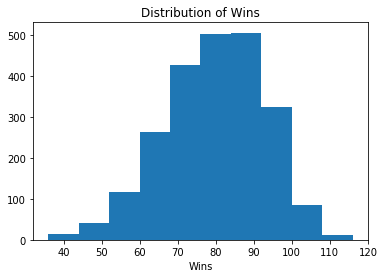

In [19]:
# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [20]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

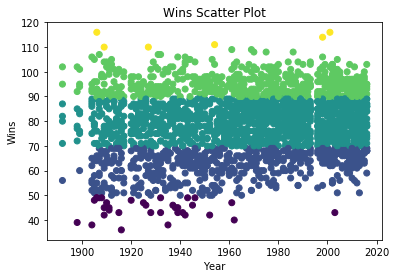

In [21]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c=df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

##### Dropping rows before 1900

From the scatter plot above, we could see that the seasons before 1900 were very different in terms of the number of teams and games. So we are going to drop all the years before 1900.

In [22]:
df = df[df['yearID'] > 1900]

##### Visualizing the scoring

Through the decades, there are different eras in baseball based on scoring. The early 1900's known as the "dead ball era" is an example of a lower scoring era. While at the turn of the 21st century, it was called the "steroid era" which was a high scoring era.

In [24]:
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

In [25]:
runs_per_year

{1904: 9307,
 1905: 9640,
 1906: 8322,
 1907: 8186,
 1908: 8423,
 1909: 8805,
 1910: 9580,
 1911: 11164,
 1912: 11154,
 1913: 9964,
 1914: 9408,
 1915: 9444,
 1916: 8889,
 1917: 8948,
 1920: 10762,
 1921: 11935,
 1922: 12059,
 1923: 11874,
 1924: 11722,
 1925: 12596,
 1926: 11443,
 1927: 11745,
 1928: 11645,
 1929: 12747,
 1930: 13695,
 1931: 11892,
 1932: 12116,
 1933: 10288,
 1934: 11325,
 1935: 10498,
 1936: 12846,
 1937: 12070,
 1938: 11260,
 1939: 11876,
 1940: 11568,
 1941: 11168,
 1942: 9457,
 1943: 9694,
 1944: 10353,
 1945: 9729,
 1946: 9953,
 1947: 10827,
 1948: 11328,
 1949: 11426,
 1950: 12013,
 1951: 11268,
 1952: 10349,
 1953: 11426,
 1954: 10827,
 1955: 11069,
 1956: 11031,
 1957: 10636,
 1958: 10578,
 1959: 10853,
 1960: 10664,
 1961: 12942,
 1962: 14461,
 1963: 12780,
 1964: 13124,
 1965: 12946,
 1966: 12900,
 1967: 12210,
 1968: 11109,
 1969: 15850,
 1970: 16880,
 1971: 15073,
 1972: 13706,
 1973: 16376,
 1974: 16046,
 1975: 16295,
 1976: 15492,
 1977: 18803,
 1978: 1

In [26]:
games_per_year

{1904: 2498,
 1905: 2474,
 1906: 2307,
 1907: 2317,
 1908: 2488,
 1909: 2482,
 1910: 2498,
 1911: 2474,
 1912: 2464,
 1913: 2468,
 1914: 2512,
 1915: 2490,
 1916: 2494,
 1917: 2494,
 1920: 2468,
 1921: 2458,
 1922: 2476,
 1923: 2466,
 1924: 2462,
 1925: 2456,
 1926: 2468,
 1927: 2472,
 1928: 2462,
 1929: 2458,
 1930: 2468,
 1931: 2472,
 1932: 2466,
 1933: 2303,
 1934: 2297,
 1935: 2158,
 1936: 2476,
 1937: 2478,
 1938: 2297,
 1939: 2462,
 1940: 2472,
 1941: 2488,
 1942: 2300,
 1943: 2476,
 1944: 2484,
 1945: 2313,
 1946: 2484,
 1947: 2486,
 1948: 2474,
 1949: 2480,
 1950: 2476,
 1951: 2478,
 1952: 2478,
 1953: 2480,
 1954: 2474,
 1955: 2468,
 1956: 2478,
 1957: 2470,
 1958: 2470,
 1959: 2476,
 1960: 2472,
 1961: 2860,
 1962: 3242,
 1963: 3238,
 1964: 3252,
 1965: 3246,
 1966: 3230,
 1967: 3240,
 1968: 3250,
 1969: 3892,
 1970: 3888,
 1971: 3876,
 1972: 3718,
 1973: 3886,
 1974: 3890,
 1975: 3868,
 1976: 3878,
 1977: 4206,
 1978: 4204,
 1979: 4198,
 1980: 4210,
 1982: 4214,
 1983: 4218,

We are now going to create a dictionary called mlb_runs_per_game.

In [28]:
mlb_runs_per_game = {}
for k,v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

In [29]:
mlb_runs_per_game

{1904: 3.7257806244995995,
 1905: 3.896523848019402,
 1906: 3.6072821846553964,
 1907: 3.5330168321104876,
 1908: 3.385450160771704,
 1909: 3.5475423045930703,
 1910: 3.8350680544435547,
 1911: 4.512530315278901,
 1912: 4.526785714285714,
 1913: 4.037277147487845,
 1914: 3.745222929936306,
 1915: 3.792771084337349,
 1916: 3.5641539695268647,
 1917: 3.587810745789896,
 1920: 4.360615883306321,
 1921: 4.855573637103336,
 1922: 4.870355411954765,
 1923: 4.815085158150851,
 1924: 4.761169780666125,
 1925: 5.128664495114006,
 1926: 4.636547811993517,
 1927: 4.75121359223301,
 1928: 4.729894394800975,
 1929: 5.185923515052888,
 1930: 5.5490275526742305,
 1931: 4.810679611650485,
 1932: 4.913219789132198,
 1933: 4.467216673903604,
 1934: 4.9303439268611235,
 1935: 4.86468952734013,
 1936: 5.188206785137318,
 1937: 4.870863599677159,
 1938: 4.902046147148455,
 1939: 4.823720552396425,
 1940: 4.679611650485437,
 1941: 4.488745980707395,
 1942: 4.111739130434783,
 1943: 3.9151857835218093,
 1944

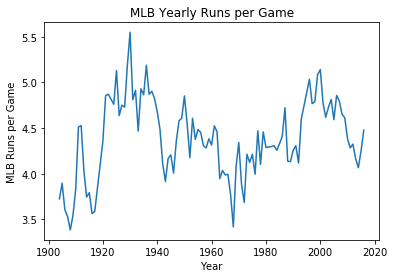

In [30]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()